In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as plyo
import sys
import cufflinks as cf
plyo.init_notebook_mode(connected=True)

In [21]:
%pip install cufflinks
%pip install

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [22]:
%pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [23]:
def get_data(symbol):
    df = pd.read_csv("{}".format(symbol),index_col="Date",parse_dates=True)
    return df['Close']

def stockplot(symbol):
    df = pd.read_csv("{}".format(symbol))
    ax = df['Close'].plot()
    ax.set_xlabel('Date')
    ax.set_ylabel("Prices")
    ax.set_title("Stock prices")
    plt.show()

def normalize(df):
    return df/df.iloc[0]
  

Date
2023-07-12          NaN
2023-07-11          NaN
2023-07-10          NaN
2023-07-07          NaN
2023-07-06          NaN
                ...    
2022-07-18    10.330616
2022-07-15    10.531185
2022-07-14    10.934376
2022-07-13    10.976609
2022-07-12    11.216759
Name: Close, Length: 252, dtype: float64

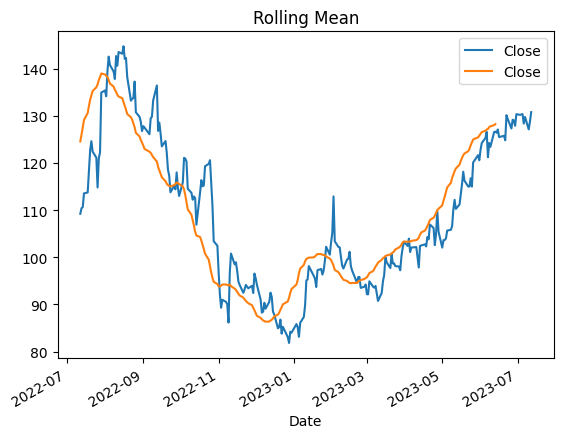

In [24]:
for symbol in ['AAPL.csv','AMZN1.csv','GOOGL.csv','BABA.csv']:
    if symbol == 'AAPL.csv':
        d1 = get_data(symbol)
    elif symbol == 'AMZN1.csv':
        d2 = get_data(symbol)
    elif symbol == 'GOOGL.csv':
        d3 = get_data(symbol)
    elif symbol == 'BABA.csv':
        d4 = get_data(symbol)

dict = {'AAPL':d1,
        'AMZN':d2,
        'GOOGL':d3,
        'BABA':d4}
df0 = pd.DataFrame(dict)
df0['AAPL'] = pd.to_numeric(df0['AAPL'])
df0['AMZN'] = pd.to_numeric(df0['AMZN'])
df0['GOOGL'] = pd.to_numeric(df0['GOOGL'])
df0['BABA'] = pd.to_numeric(df0['BABA'],)


df1=pd.read_csv('AMZN1.csv',index_col="Date",parse_dates=True)
df2=pd.read_csv('AAPL.csv',index_col="Date",parse_dates=True,usecols=['Date','Close'])
df3=df2.join(df1,lsuffix='_left',rsuffix='_right')

rm_df1 = df1['Close'].rolling(20).mean()
sd_df1 = df1['Close'].rolling(20).std()
bb1 = rm_df1 + (sd_df1*2)
bb2 = rm_df1 - (sd_df1*2)
ax = df1['Close'].plot(title='Rolling Mean',legend='AMZN')
rm_df1.plot(legend='Rolling Mean',ax=ax)

sd_df1

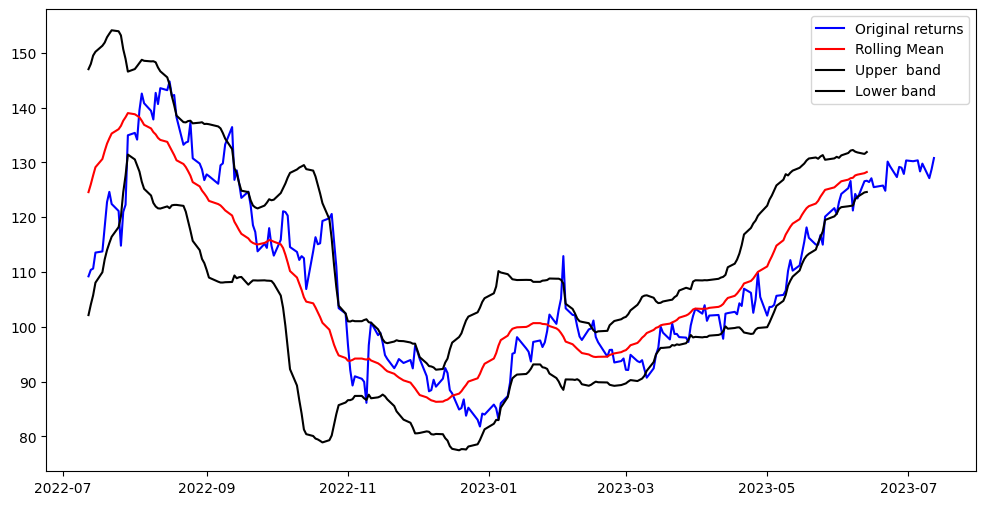

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df1['Close'],color='blue',label='Original returns')
plt.plot(rm_df1,color='red',label='Rolling Mean')
plt.plot(bb1,color='black',label='Upper  band')
plt.plot(bb2,color='black',label='Lower band')
#plt.plot(rolstd,color='black',label='Rolling Std Deviation ')
plt.legend(loc='best')
plt.show()

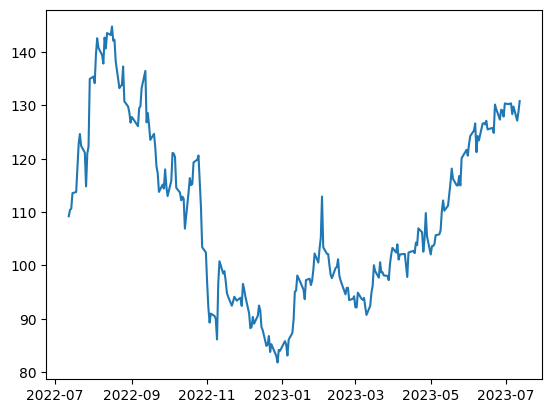

In [26]:
df1_ret = df1['Close'].resample('d').mean()
df1_ret = np.log(df1_ret).diff()

plt.plot(df1['Close'])


<Axes: xlabel='Date'>

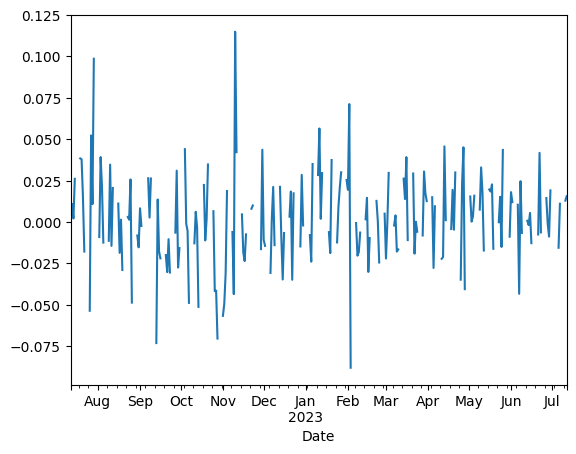

In [27]:
df1_ret.plot()

1.9277482508667072

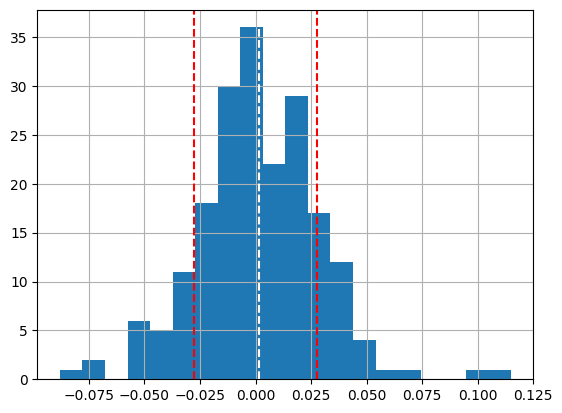

In [28]:

df1_ret.hist(bins=20)
mean = df1_ret.mean()

std = df1_ret.std()

plt.axvline(mean,color='white',linestyle='--')
plt.axvline(std,color='red',linestyle='--')
plt.axvline(-std,color='red',linestyle='--')

df1_ret.kurtosis()

In [32]:
start_value = 100000
allocs = [0.4,0.4,0.1,0.1]
df0



In [33]:
nd = normalize(df0)
allocs = nd * allocs
pos_vals = allocs*start_value
df0['Portfolio Values'] = pos_vals.sum(axis=1)
plt.plot(df0['Portfolio Values'])


ValueError: Unable to coerce to Series, length must be 5: given 4

In [ ]:
df1['Low']

Date
2023-07-12    128.83
2023-07-11    127.35
2023-07-10    125.92
2023-07-07    128.13
2023-07-06    127.37
               ...  
2022-07-18    113.15
2022-07-15    111.59
2022-07-14    107.58
2022-07-13    106.01
2022-07-12    108.34
Name: Low, Length: 252, dtype: float64

In [ ]:

cf.go_offline()
df1 = df1[['Open','High','Low','Close']]

qf = cf.QuantFig(df1)
qf.add_bollinger_bands(periods=20,boll_std=2)


In [ ]:
plyo.iplot(qf.iplot(),image='png',filename='qf_01')

PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure